## 3️⃣ - PCW Problems 

### Part A

**Q1:** Let's start with a recursive top-down, naive solution to the rod cutting problem. Please complete the cut_rod function below:

In [24]:
def cut_rod(p, n):
    """
    A recursive top-down solution to the rod cutting problem as described in 
    Cormen et. al. (pp 363) This calculates the maximum revenue that could be 
    earned by cutting up a rod of length n.
    Parameters
    ----------
    p
        list of floats, the prices of rods of different lengths. p[i] gives the 
    dollars of revenue the company earns selling a rod of length i+1.
    n
        int, length of the rod
    Returns
    -------
    q
        float, the optimal revenue
    """
    
    # check edgecase if there is no rod
    
    if n == 0:  
        return 0
    
    # maximum revenue to negative inf
    l = float('-inf')  
    
    # iterate over the pieces 
    for cut in range(n):
        l = max(l, p[cut]+cut_rod(p, n-cut-1))
    
    return l


In [25]:
#tests 


# price list from the textbook
# p[i] gives the price of length i+1
p = [1,5,8,9,10,17,17,20,24,30] 

# revenue (optimal) results from the textbook
r = [0,1,5,8,10,13,17,18,22,25,30]
for i in range(len(r)):
    print(f"Checking the solution for maximum revenue of length {i+1}...")
    try:
        assert(cut_rod(p, i)==r[i])
        print("\t✅ passed test!")
    except:
        print("\t🐞 Found a bug, please review your code.")
        break

Checking the solution for maximum revenue of length 1...
	✅ passed test!
Checking the solution for maximum revenue of length 2...
	✅ passed test!
Checking the solution for maximum revenue of length 3...
	✅ passed test!
Checking the solution for maximum revenue of length 4...
	✅ passed test!
Checking the solution for maximum revenue of length 5...
	✅ passed test!
Checking the solution for maximum revenue of length 6...
	✅ passed test!
Checking the solution for maximum revenue of length 7...
	✅ passed test!
Checking the solution for maximum revenue of length 8...
	✅ passed test!
Checking the solution for maximum revenue of length 9...
	✅ passed test!
Checking the solution for maximum revenue of length 10...
	✅ passed test!
Checking the solution for maximum revenue of length 11...
	✅ passed test!


**Q2:** Now, let's code an optimal rod cutting solution using dynamic programming (see figure here for inspiration). This is the extended_bottom_up_cut_rod function, whose output is later used by the print_cut_rod_solution function to obtain the optimal solution. Please complete the following two functions:

In [26]:
def extended_bottom_up_cut_rod(p,n):
    """
    Implements a bottom-up dynamic programming approach to the rod cutting problem.
    Here, "extended" means the function is geared in a way amenable to reconstructing
    an optimal solution, on top of the returned optimal value. See Cormen et al.,
    p. 269 for the implementation details.
    Parameters
    ----------
    p
        list of floats, the prices of rods of different lengths. p[i] gives the dollars
    of revenue the company earns selling a rod of length i+1.
    n
        int, length of the rod
    Returns
    -------
    r
        list of floats, the maximum revenues. r[i] gives the maximum revenue for a rod of length i. As such:
        * r[0] = 0
        * len(r) = n + 1
    s
        list of ints, the optimal sizes of the first piece to cut off. Also make sure that:
        * s[0] = 0
        * len(s) = n + 1
    """
    #initialize lists of zeros for r and s
    r = [0]*(n+1)
    s = [0]*(n+1)
    
    #iterate through all the different first cut sizes
    for j in range(1, n+1):
        
        #initialize a negative sentinel value for the revenue
        q = -float('inf')
        
        #for every cut, if the new revenue is larger, then store it
        #and store the size of the cut
        for i in range(j):
            
            if q < p[i] + r[j-i-1]:
                q = p[i] + r[j-i-1]
                s[j] = i + 1
        
        #store the optimal revenue
        r[j] = q
    return r, s
    

def print_cut_rod_solution(p,n):
    """
    Gives a solution to the rod cutting problem of size n. 
    Parameters
    ----------
    p
    	list of floats, the prices of rods of different lengths. p[i] gives the revenue (in USD, for example) the company earns selling a rod of length i+1.
    n
    	int, length of the rod
    Returns
    -------
    sol
    	a list of ints, indicating how to cut the rod. Cutting the rod with the lengths given in sol gives the optimal revenue.
    """
    r, s = extended_bottom_up_cut_rod(p,n)
    
    while n > 0:
        print(s[n])
        n = n - s[n]
        

In [27]:
# price list from the textbook
# p[i] gives the price of length i+1
p = [1,5,8,9,10,17,17,20,24,30] 

# results of optimal revenues and sizes from the textbook:
revenues_results = [0,1,5,8,10,13,17,18,22,25,30]
sizes_results = [0,1,2,3,2,2,6,1,2,3,10]

# testing
r, s = extended_bottom_up_cut_rod(p, 10)
assert(r == revenues_results)
assert(s == sizes_results)

**Part B - Experiments**

**Q3:** Use the function below to generate a list of prices of length n=20 and assign that list to a new variable, p_20. You MUST use this list for questions 4 and 5 below.

In [28]:
import numpy as np
def generate_price_list(n):
    """
    Generates a price list of length n
    Parameters
    ----------
    n
    	integer, length of the list, must be positive
    Returns
    ----------
    p
    	list, the ordered price list for each rod cut
    """
    
    p = [1]
    for i in range(1, n):
        np.random.seed(0)
        p.append(np.random.randint(p[i-1]+1, i*3+1))
    return p

#calling function 
p_20 = generate_price_list(20)
p_20


[1, 2, 3, 8, 9, 14, 15, 20, 21, 26, 27, 32, 33, 38, 39, 44, 45, 50, 51, 56]

**Q4:** Time (using the time library) the implementation of cut_rod for different rod lengths for values of up to n=20. Present your results in a plot.

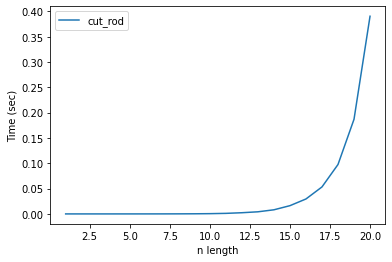

In [29]:
## your code here

import time
import matplotlib.pyplot as plt

n = [i for i in range(1, 21)]

# measure time
times = []
for val in n:
    start_time = time.time()
    cut_rod(p_20, val)
    end_time = time.time()
    times.append(end_time - start_time)
    
    

# plot
plt.plot(n, times, label = 'cut_rod')
plt.xlabel("n length")
plt.ylabel("Time (sec)")
plt.legend()


**Q5:** Time (using the time library) the implementation of extended_bottom_up_cut_rod for different rod lengths for values of up to = n=20. Add the curve corresponding to this algorithm to the previous plot. That is, below, we should see two clear curves within the same plot (please review all the critical elements of your #dataviz for a successful implementation of this HC).

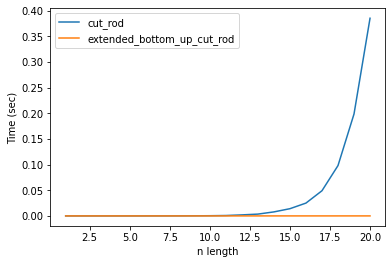

In [30]:
## your code here

import time
import matplotlib.pyplot as plt

n = [i for i in range(1, 21)]

# measure time for cut rod
times = []
for val in n:
    start_time = time.time()
    cut_rod(p_20, val)
    end_time = time.time()
    times.append(end_time - start_time)

# measure time for extended cut rod
times_ext = []
for val in n:
    start_time = time.time()
    extended_bottom_up_cut_rod(p_20, val)
    end_time = time.time()
    times_ext.append(end_time - start_time)
    
# plot
plt.plot(n, times, label = 'cut_rod')
plt.plot(n, times_ext,  label = 'extended_bottom_up_cut_rod')
plt.xlabel("n length")
plt.ylabel("Time (sec)")
plt.legend()

**Q6:** Contrast both curves. What can you conclude and why? Are the experimental results in agreement with what you expected? Refer to specific elements of the plot above, and include any other theoretical aspects that you deem relevant.

The dynamic programming approach, represented by the extended_bottom_up_cut_rod curve, has a relatively flat curve compared to the naive approach, represented by the cut_rod curve, which shows a steep increase in execution time with longer rod lengths. This highlights the efficiency of the bottom-up approach of dynamic programming over the recursive top-down approach of the naive solution, which becomes increasingly inefficient with larger rod lengths due to redundant calculations and overlapping subproblems. These results clearly demonstrate that dynamic programming is the better choice for solving the rod-cutting problem. (87 words)

**Part C - After completing your experiments above, answer the following questions:**

**Q7:** Estimate how big n has to be before the non-dynamic-programming version, implemented via the cut_rod function, will take a million years to finish. Call this value n_onemillion.

For n = 20, the time in sec is around 0.5, for one million years using the big O notation:

In [31]:
import math

#2^N

n_onemillion = math.log(31556952*10**6)/math.log(2)
print(n_onemillion)

44.84302309963356


**Q8:** Estimate (or time) how long it takes to evaluate extended_bottom_up_cut_rod(p, n_onemillion), where n_onemillion is the value you got from the previous question.

In [32]:
print('Analytically:')
print(n_onemillion**2, 'sec')
print(n_onemillion**2/60, 'min')
print(n_onemillion**2/31556952, 'years')
print('-------')

ttime = 0
p = generate_price_list(45)
for i in range(50):
    start = time.process_time()
    extended_bottom_up_cut_rod(p, 45)
    end = time.process_time()
    ttime += end - start

avgtime = ttime/50
print('Practically:')
print(avgtime, 'secs')

Analytically:
2010.8967207142693 sec
33.51494534523782 min
6.372278034691909e-05 years
-------
Practically:
0.00018400000000006855 secs


**Q9:** Do you notice anything peculiar about the solution for large n? Explain your answer in connection to #ComplexityAnalysis (~50 words).

Extended_bottom_up_cut_rod algorithm has a time complexity of O(n^2) for large input sizes, where execution time grows fourfold when input size doubles. The time taken to find the optimal solution increases proportionally to the square of the input size. In contrast, the recursive approach has an exponential time complexity of O(2^n), and even a small change in input size can significantly increase the running time. Dynamic programming is a more efficient and appropriate method for handling multiple instances of this problem. (80 words)